In [18]:
import tensorflow as tf
import numpy as np
import zipfile

In [ ]:
val = zipfile.ZipFile('train.zip','r')
val.extractall('train')
val.close()

In [ ]:
test = zipfile.ZipFile('testing.zip','r')
test.extractall('test')
test.close()

In [ ]:
train = zipfile.ZipFile('validasi.zip','r')
train.extractall('val')
train.close()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Train
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.3,
        horizontal_flip=False)


train_generator = train_datagen.flow_from_directory(
    'train/train',
    target_size=(200,200),
    batch_size=32,
    class_mode = 'categorical'
)


# Validation
validation_datagen = ImageDataGenerator(rescale=1/255)

val_generator = validation_datagen.flow_from_directory(
    'val',
    target_size=(200,200),
    batch_size=32,
    class_mode = 'categorical'
)

Found 3780 images belonging to 18 classes.
Found 810 images belonging to 18 classes.


In [ ]:
from tensorflow.keras.applications import VGG16

pre_trained_model = VGG16(input_shape=(200, 200,3),
                                include_top=False,
                                weights='imagenet')


# freeze the layers
for layer in pre_trained_model.layers:
    layer.trainable = False

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

model= tf.keras.models.Sequential([
    pre_trained_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(18,activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 18432)             0         
                                                                 
 dense (Dense)               (None, 1024)              18875392  
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_1 (Dense)             (None, 18)                18450     
                                                                 
Total params: 33608530 (128.21 MB)
Trainable params: 18893842 (72.07 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator,
            validation_data=val_generator,
            epochs=20,
            verbose=1)

Epoch 1/20
119/119 [==============================] - 56s 392ms/step - loss: 2.1597 - accuracy: 0.4667 - val_loss: 0.5256 - val_accuracy: 0.9025
Epoch 2/20
119/119 [==============================] - 44s 367ms/step - loss: 0.7548 - accuracy: 0.7646 - val_loss: 0.1927 - val_accuracy: 0.9679
Epoch 3/20
119/119 [==============================] - 44s 371ms/step - loss: 0.5249 - accuracy: 0.8259 - val_loss: 0.1236 - val_accuracy: 0.9753
Epoch 4/20
119/119 [==============================] - 47s 398ms/step - loss: 0.4056 - accuracy: 0.8698 - val_loss: 0.0836 - val_accuracy: 0.9815
Epoch 5/20
119/119 [==============================] - 45s 380ms/step - loss: 0.3783 - accuracy: 0.8775 - val_loss: 0.0974 - val_accuracy: 0.9840
Epoch 6/20
119/119 [==============================] - 45s 381ms/step - loss: 0.3441 - accuracy: 0.8897 - val_loss: 0.0632 - val_accuracy: 0.9901
Epoch 7/20
119/119 [==============================] - 44s 373ms/step - loss: 0.3209 - accuracy: 0.9003 - val_loss: 0.0656 - val_ac

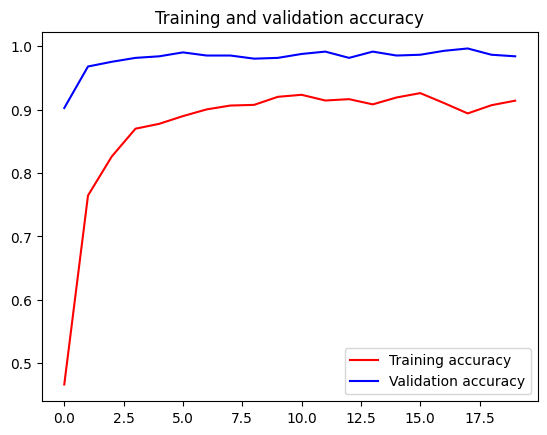

<Figure size 640x480 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [11]:
test_datagen = ImageDataGenerator(rescale=1./255)

# Buat generator untuk data pelatihan
test_generator = test_datagen.flow_from_directory(
    'test',
    target_size=(200, 200),
    batch_size=32,  # Anda dapat menyesuaikan batch_size sesuai kebutuhan Anda
    class_mode='categorical',  # Pastikan class_mode sesuai dengan jenis klasifikasi Anda
    shuffle=False  # Set shuffle=False untuk menjaga urutan data tetap
)
from sklearn.metrics import classification_report
# Prediksi menggunakan model
predIdxs = model.predict(test_generator)

# Konversi prediksi ke label kelas
predIdxs = np.argmax(predIdxs, axis=1)

# Cetak laporan klasifikasi
print(classification_report(test_generator.classes, predIdxs, target_names=test_generator.class_indices.keys()))

Found 810 images belonging to 18 classes.
26/26 [==============================] - 3s 110ms/step
              precision    recall  f1-score   support

          ba       1.00      0.98      0.99        45
          ca       1.00      1.00      1.00        45
          da       1.00      1.00      1.00        45
          ga       1.00      1.00      1.00        45
          ha       1.00      1.00      1.00        45
          ja       0.98      1.00      0.99        45
          ka       1.00      1.00      1.00        45
          la       1.00      1.00      1.00        45
          ma       1.00      1.00      1.00        45
          na       0.96      1.00      0.98        45
         nga       1.00      0.96      0.98        45
         nya       0.98      1.00      0.99        45
          pa       1.00      1.00      1.00        45
          ra       1.00      1.00      1.00        45
          sa       1.00      1.00      1.00        45
          ta       0.94      1.00     

In [14]:
from keras.models import load_model

# Simpan model ke dalam file .h5
model.save('VGG16.h5')

# Kemudian Anda dapat memuat model dari file .h5 yang disimpan
# loaded_model = load_model('nama_model.h5')


In [13]:
!pip install tensorflowjs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 55.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 94.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 109.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 118.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 101.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 116.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 86.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 42.1 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.0
    Uninstalling packaging-24.0:
 

In [16]:
!tensorflowjs_converter --input_format keras --output_format=tfjs_graph_model VGG16.h5 path_to_save_model

2024-06-09 13:12:34.085888: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
2024-06-09 13:12:36.261658: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2024-06-09 13:12:37.060482: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.
2024-06-09 13:12:45.760672: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.
2024-06-09 13:12:46.674574: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.
2024-06-09 13:12:46.974086: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 75497472 exceeds 10% of free system memory.
2024-06-09 13:12:53.218319: W external/local_tsl/tsl/framework/cpu_alloc

In [19]:
!zip -r path_to_save_model.zip path_to_save_model
from google.colab import files
files.download('path_to_save_model.zip')


updating: path_to_save_model/ (stored 0%)
updating: path_to_save_model/group1-shard31of33.bin (deflated 8%)
updating: path_to_save_model/group1-shard15of33.bin (deflated 8%)
updating: path_to_save_model/group1-shard21of33.bin (deflated 8%)
updating: path_to_save_model/group1-shard27of33.bin (deflated 8%)
updating: path_to_save_model/group1-shard25of33.bin (deflated 8%)
updating: path_to_save_model/group1-shard18of33.bin (deflated 8%)
updating: path_to_save_model/group1-shard24of33.bin (deflated 8%)
updating: path_to_save_model/group1-shard2of33.bin (deflated 7%)
updating: path_to_save_model/group1-shard29of33.bin (deflated 8%)
updating: path_to_save_model/group1-shard11of33.bin (deflated 7%)
updating: path_to_save_model/group1-shard6of33.bin (deflated 7%)
updating: path_to_save_model/group1-shard32of33.bin (deflated 8%)
updating: path_to_save_model/group1-shard12of33.bin (deflated 7%)
updating: path_to_save_model/group1-shard28of33.bin (deflated 8%)
updating: path_to_save_model/group1-

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>